In [1]:
# Extract Tweet of a Specific person :

# https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html

In [25]:
pip install streamlit

  Using cached streamlit-0.86.0-py2.py3-none-any.whl (8.0 MB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached base58-2.1.0-py3-none-any.whl (5.6 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached blinker-1.4-py3-none-any.whl
  Using cached pyarrow-5.0.0-cp38-cp38-macosx_10_13_x86_64.whl (17.6 MB)
  Using cached pydeck-0.6.2-py2.py3-none-any.whl (4.2 MB)
  Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)
  Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
  Using cached smmap-4.0.0-py2.py3-none-any.whl (24 kB)


You should consider upgrading via the '/Users/arieframasyarif/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [27]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "masukan_consumer_key"
consumer_secret = "masukan_consumer_secret"
access_token = "masukan_access_token"
access_token_secret = "Masukan_token_secret"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [28]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [29]:
# We will use api as api.search inside this tweepy cursor.

In [30]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="id",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [31]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["PPKM"]
get_tweets(Topic , Count=100)

In [32]:
df.head(50)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-08-10 08:30:34,faya,False,"ternyata yang bisa diperpanjang tu cuman ppkm,...",0,0,"Bali, Indonesia"
1,2021-08-10 08:30:32,AY. Pahang,False,Terlalu banyak aturan.. \nDari PSBB sampai PPK...,0,0,Negri Antara
2,2021-08-10 08:30:32,tan,False,ppkm sampe tanggal 16 ntar udah tanggal 16 per...,0,0,ㅡjunsahi's thinker zone ♡ᵎˎˊ˗
3,2021-08-10 08:30:30,🦖🌋,False,PPKM 2022? https://t.co/htiFImqu7z,0,0,
4,2021-08-10 08:30:29,Pasundan Ekspres,False,"Dampak PPKM, Biaya Produksi Usaha Ternak Ayam ...",0,0,Jln. Ahmad Yani No. 110 Subang
5,2021-08-10 08:30:28,Pauℓ𓍯🇮🇩⁷⁶ᵗʰ,False,@eefemmy Dia lagi ppkm,0,0,
6,2021-08-10 08:30:16,Ririn Rahmatika,False,Balikin MTV ampuh dulu baru perpanjang PPKM !,0,0,Padang
7,2021-08-10 08:30:16,mas,False,Lamaan ppkm dari pada gua pdkt,0,0,
8,2021-08-10 08:30:05,user,False,"@mhdarief2208 ppkm level 50, bangun dinding ka...",0,0,
9,2021-08-10 08:30:00,CNN Indonesia,True,Perpanjangan PPKM Level 4 kali ini dibarengi d...,0,0,


# Analyze the tweets

In [33]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [34]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [35]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [36]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-08-10 08:30:34,faya,False,"ternyata yang bisa diperpanjang tu cuman ppkm,...",0,0,"Bali, Indonesia",ternyata yang bisa diperpanjang tu cuman ppkm ...
1,2021-08-10 08:30:32,AY. Pahang,False,Terlalu banyak aturan.. \nDari PSBB sampai PPK...,0,0,Negri Antara,terlalu banyak aturan dari psbb sampai ppkm cu...
2,2021-08-10 08:30:32,tan,False,ppkm sampe tanggal 16 ntar udah tanggal 16 per...,0,0,ㅡjunsahi's thinker zone ♡ᵎˎˊ˗,ppkm sampe tanggal 16 ntar udah tanggal 16 per...
3,2021-08-10 08:30:30,🦖🌋,False,PPKM 2022? https://t.co/htiFImqu7z,0,0,,ppkm 2022
4,2021-08-10 08:30:29,Pasundan Ekspres,False,"Dampak PPKM, Biaya Produksi Usaha Ternak Ayam ...",0,0,Jln. Ahmad Yani No. 110 Subang,dampak ppkm biaya produksi usaha ternak ayam b...
5,2021-08-10 08:30:28,Pauℓ𓍯🇮🇩⁷⁶ᵗʰ,False,@eefemmy Dia lagi ppkm,0,0,,dia lagi ppkm
6,2021-08-10 08:30:16,Ririn Rahmatika,False,Balikin MTV ampuh dulu baru perpanjang PPKM !,0,0,Padang,balikin mtv ampuh dulu baru perpanjang ppkm
7,2021-08-10 08:30:16,mas,False,Lamaan ppkm dari pada gua pdkt,0,0,,lamaan ppkm dari pada gua pdkt
8,2021-08-10 08:30:05,user,False,"@mhdarief2208 ppkm level 50, bangun dinding ka...",0,0,,ppkm level 50 bangun dinding kaya di aot
9,2021-08-10 08:30:00,CNN Indonesia,True,Perpanjangan PPKM Level 4 kali ini dibarengi d...,0,0,,perpanjangan ppkm level 4 kali ini dibarengi d...


In [37]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-08-10 08:30:34,faya,False,"ternyata yang bisa diperpanjang tu cuman ppkm,...",0,0,"Bali, Indonesia",ternyata yang bisa diperpanjang tu cuman ppkm ...,Negative
1,2021-08-10 08:30:32,AY. Pahang,False,Terlalu banyak aturan.. \nDari PSBB sampai PPK...,0,0,Negri Antara,terlalu banyak aturan dari psbb sampai ppkm cu...,Neutral
2,2021-08-10 08:30:32,tan,False,ppkm sampe tanggal 16 ntar udah tanggal 16 per...,0,0,ㅡjunsahi's thinker zone ♡ᵎˎˊ˗,ppkm sampe tanggal 16 ntar udah tanggal 16 per...,Positive
3,2021-08-10 08:30:30,🦖🌋,False,PPKM 2022? https://t.co/htiFImqu7z,0,0,,ppkm 2022,Neutral
4,2021-08-10 08:30:29,Pasundan Ekspres,False,"Dampak PPKM, Biaya Produksi Usaha Ternak Ayam ...",0,0,Jln. Ahmad Yani No. 110 Subang,dampak ppkm biaya produksi usaha ternak ayam b...,Neutral
5,2021-08-10 08:30:28,Pauℓ𓍯🇮🇩⁷⁶ᵗʰ,False,@eefemmy Dia lagi ppkm,0,0,,dia lagi ppkm,Neutral
6,2021-08-10 08:30:16,Ririn Rahmatika,False,Balikin MTV ampuh dulu baru perpanjang PPKM !,0,0,Padang,balikin mtv ampuh dulu baru perpanjang ppkm,Neutral
7,2021-08-10 08:30:16,mas,False,Lamaan ppkm dari pada gua pdkt,0,0,,lamaan ppkm dari pada gua pdkt,Neutral
8,2021-08-10 08:30:05,user,False,"@mhdarief2208 ppkm level 50, bangun dinding ka...",0,0,,ppkm level 50 bangun dinding kaya di aot,Neutral
9,2021-08-10 08:30:00,CNN Indonesia,True,Perpanjangan PPKM Level 4 kali ini dibarengi d...,0,0,,perpanjangan ppkm level 4 kali ini dibarengi d...,Neutral


In [38]:
# Check Summary of Random Record
# Ganti nilai n dengan Nomor yang ingin anda summarykan
n = 10
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Peneliti Indef Ahmad Heri Firdaus mengatakan, perpanjangan PPKM pada bulan Agustus ini akan mempengaruhi pertumbuha… https://t.co/ZCsm6YHaRi

Clean tweet:
 peneliti indef ahmad heri firdaus mengatakan perpanjangan ppkm pada bulan agustus ini akan mempengaruhi pertumbuha

Sentiment of the tweet:
 Neutral


In [39]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['PPKM'] are : 101
Total Positive Tweets are : 9
Total Negative Tweets are : 3
Total Neutral Tweets are : 89


In [40]:
df["Sentiment"].value_counts()

Neutral     89
Positive     9
Negative     3
Name: Sentiment, dtype: int64

/Users/arieframasyarif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

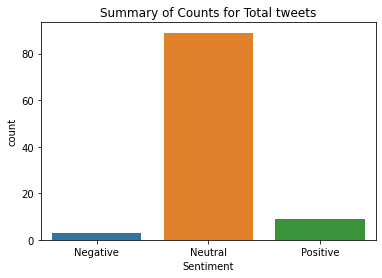

In [41]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


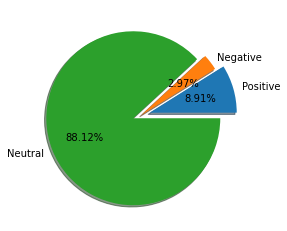

In [42]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/Users/arieframasyarif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

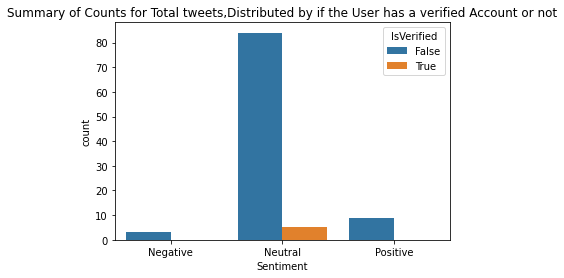

In [43]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

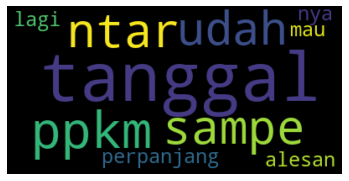

In [45]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 7716 words in the combination of all review.


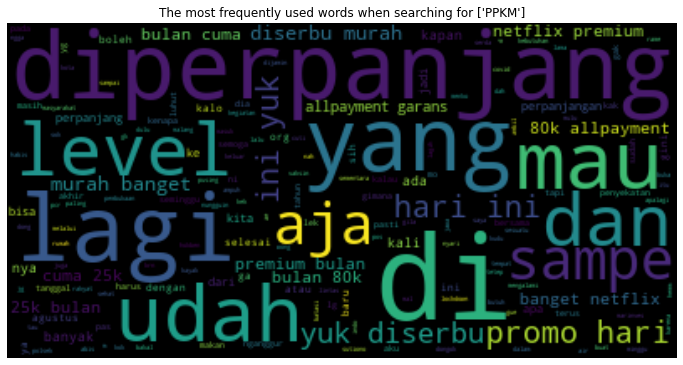

In [46]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

There are 7716 words in the combination of all review.


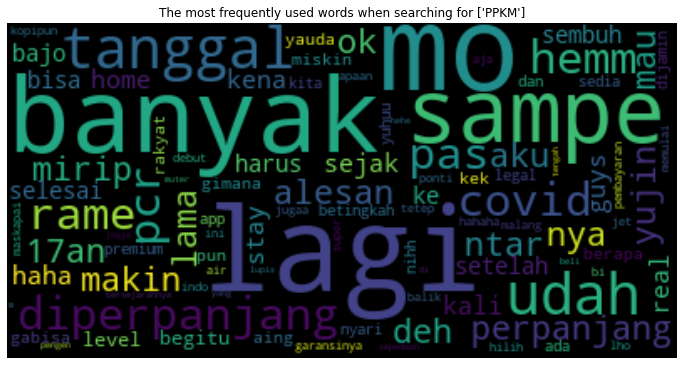

In [47]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 7716 words in the combination of all review.


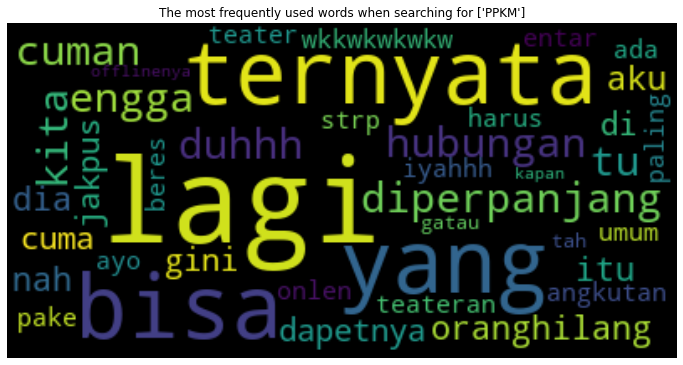

In [48]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [49]:
# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("/Users/arieframasyarif/Python⁩")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arieframasyarif/Python\u2069'

In [ ]:
!pip install streamlit